In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import np_utils, load_img, img_to_array
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions
from keras.applications.vgg19 import VGG19

In [3]:
#unzipping data
"""
import zipfile
with zipfile.ZipFile("archive.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")
"""

'\nimport zipfile\nwith zipfile.ZipFile("archive.zip","r") as zip_ref:\n    zip_ref.extractall("targetdir")\n'

In [4]:
#Renaming data
"""
import os
path = 'targetdir/rolled_pit'
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, ''.join([f'rolled_pit [{str(index)}]', '.jpg'])))
"""

"\nimport os\npath = 'targetdir/rolled_pit'\nfiles = os.listdir(path)\n\n\nfor index, file in enumerate(files):\n    os.rename(os.path.join(path, file), os.path.join(path, ''.join([f'rolled_pit [{str(index)}]', '.jpg'])))\n"

In [7]:
import os
X= []
Y= []
path = 'targetdir/oil_spot'
files = os.listdir(path)

for index, file in enumerate(files):
    img= cv2.imread(fr"targetdir/oil_spot/oil_spot [{index}].jpg")
    img= cv2.resize(img, (56,56))
    X.append(img)
    Y.append(0)

In [8]:
path = 'targetdir/inclusion'
files = os.listdir(path)

for index, file in enumerate(files):
    img= cv2.imread(fr"targetdir/inclusion/inclusion [{index}].jpg")
    img= cv2.resize(img, (56,56))
    X.append(img)
    Y.append(1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.3)

In [10]:
X_train = np.array(X_train, dtype = 'float')
y_train = np.array(y_train, dtype = 'float').astype('float32').reshape((-1,1))
X_test = np.array(X_test, dtype = 'float')
y_test = np.array(y_test, dtype = 'float').astype('float32').reshape((-1,1))

In [11]:
n_classes = 2

X_train /= 255
X_test /= 255


In [15]:
w=l=56
model = Sequential()
model.add(Conv2D(56, kernel_size=(2,2), strides=(1,1), padding='valid', activation='relu', input_shape=(w,l,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(112, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(224, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(112, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(56, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='linear'))

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'])

In [16]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 56)        728       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 56)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 40824)             0         
                                                                 
 dense (Dense)               (None, 112)               4572400   
                                                                 
 dropout (Dropout)           (None, 112)               0         
                                                                 
 dense_1 (Dense)             (None, 224)               25312     
                                                      

In [18]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [19]:
H = model.fit(X_train, y_train, batch_size = 10, epochs = N, validation_data = (X_test, y_test))


Epoch 1/100
26/26 [==============================] - 2s 58ms/step - loss: 4.7978 - accuracy: 0.6523 - val_loss: 3.7672 - val_accuracy: 0.7663
Epoch 2/100
26/26 [==============================] - 1s 50ms/step - loss: 4.0879 - accuracy: 0.7305 - val_loss: 3.7672 - val_accuracy: 0.7663
Epoch 3/100
26/26 [==============================] - 1s 52ms/step - loss: 3.5058 - accuracy: 0.7422 - val_loss: 3.7606 - val_accuracy: 0.7663
Epoch 4/100
26/26 [==============================] - 1s 53ms/step - loss: 3.1924 - accuracy: 0.7461 - val_loss: 0.5010 - val_accuracy: 0.7663
Epoch 5/100
26/26 [==============================] - 1s 52ms/step - loss: 0.9102 - accuracy: 0.7188 - val_loss: 0.4867 - val_accuracy: 0.7763
Epoch 6/100
26/26 [==============================] - 1s 55ms/step - loss: 0.5052 - accuracy: 0.7383 - val_loss: 0.4973 - val_accuracy: 0.7830
Epoch 7/100
26/26 [==============================] - 1s 52ms/step - loss: 0.4791 - accuracy: 0.7070 - val_loss: 0.4286 - val_accuracy: 0.7663
Epoch 

KeyboardInterrupt: 

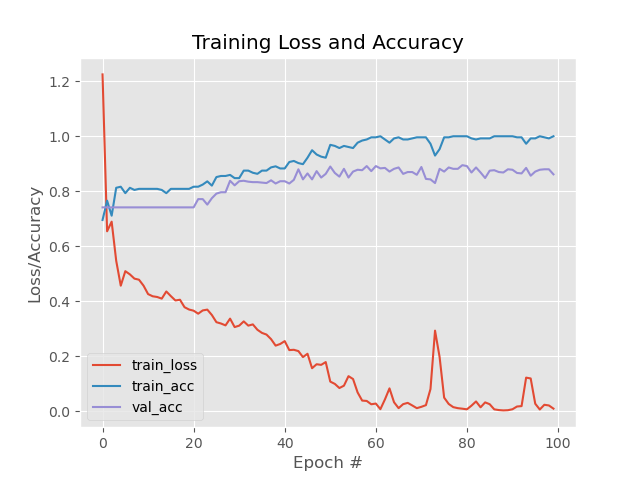

In [68]:
N=100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

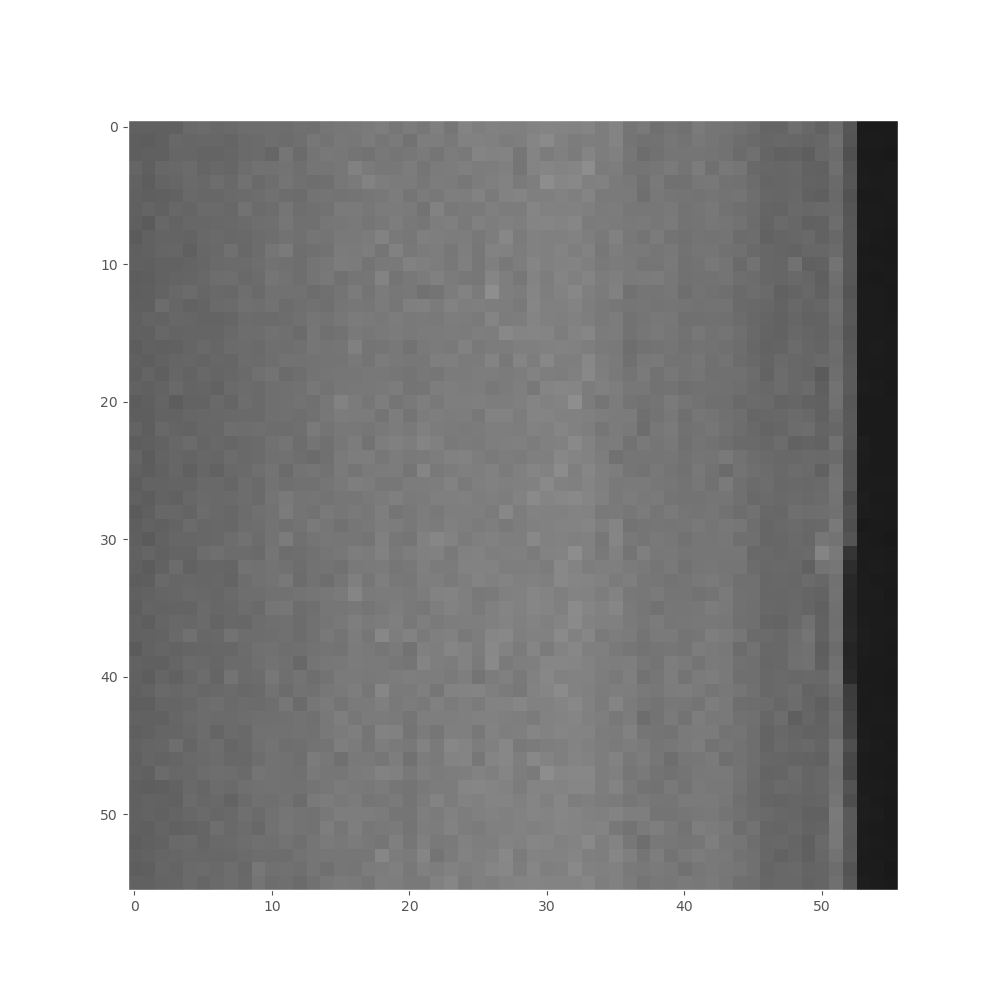

In [71]:
random_img= X[515]
randm_img=[random_img]
plt.figure(figsize=(10,10))
plt.imshow(random_image)
plt.grid(False)
plt.show()

In [72]:
prediction = model.predict(random_img)  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

ValueError: in user code:

    File "C:\Users\Toqa Alaa\anaconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Toqa Alaa\anaconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Toqa Alaa\anaconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Toqa Alaa\anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\Toqa Alaa\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Toqa Alaa\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 56, 56, 3), found shape=(None, 56, 3)


In [73]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

NameError: name 'prediction' is not defined

In [ ]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")
print(f"Real data: {Y[515]}")

In [ ]:
import random
DataSet_length= len(X)
#ig = plt.figure(figsize=(7, 7))
#fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
incorrect_predictions= 0

for i in range(DataSet_length-1):
    # =random.randint(0, DataSet_length-1)
    random_image= X[i]
    real_val= Y[i]
    random_img= X[i]
    random_img=[random_img]
    random_img = np.array(random_img, dtype = 'float')
    random_img/=255
    #lt.grid(False)
    #ig.add_subplot(2, 5, i+1)
    prediction = model.predict(random_img)
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    if yhat!= real_val:
        incorrect_predictions+=1
        
    #lt.imshow(img, aspect = 'auto')

In [157]:
print(incorrect_predictions)

103
